# Decisive Probability Distributions

In this activity, you’ll use the Alpaca API to gather pricing information for six stocks. Then, you’ll use this information to plot probability distributions for the daily returns of the stocks. Finally, you’ll determine the most and the least volatile stocks.
Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `LUV` (Southwest Airlines)

    - `DIS` (Disney) 

    - `AAPL` (Apple)

    - `SBUX` (Starbucks)

    - `ZM` (Zoom)

> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_barset` function to make the API call. Be sure to set the `df` property at the end of the `get_barset` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all six stocks.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)

## Import the required libraries and dependencies

In [15]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import seaborn as sns
%matplotlib inline

## Step 1: Create your `.env` file at the root of your Unsolved folder. It should include your Alpaca API and secret keys. 

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [16]:
# Load the environment variables by calling the load_dotenv function

load_dotenv()

True

In [17]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type("ALPACA_API_KEY"))
display(type("ALPACA_SECRET_KEY"))
    


str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [18]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers: SPY, LUV, DIS, AAPL, SBUX, and ZM. 

* Create the list for the required `tickers`
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_barset` function. 

In [19]:
# Create the list for the required tickers
tickers = ['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX', 'ZM']


In [20]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2020-06-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-30", tz="America/New_York").isoformat()

In [21]:
# Set timeframe to one day (1D)


# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [23]:
# Use the Alpaca get_barset function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = portfolio_prices_df = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date
).df


# Review the first five rows of the resulting DataFrame 
# YOUR CODE HERE
prices_df.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-06-30 04:00:00+00:00,360.08,365.98,360.00,364.80,35055916,332672,363.874602,AAPL
2020-07-01 04:00:00+00:00,365.01,367.36,363.91,364.11,27690454,317161,365.704494,AAPL
2020-07-02 04:00:00+00:00,367.88,370.47,363.64,364.11,28511095,304465,367.043927,AAPL
2020-07-06 04:00:00+00:00,369.95,375.78,369.87,373.85,29736108,335184,373.408021,AAPL
2020-07-07 04:00:00+00:00,375.54,378.62,372.23,372.69,28106823,312187,375.707017,AAPL


## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [39]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = prices_df.loc[:,('symbol', 'close')]

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
#for ticker in tickers:
    # YOUR CODE HERE

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())


,symbol,close
2020-06-30,AAPL,364.80
2020-07-01,AAPL,364.11
2020-07-02,AAPL,364.11
2020-07-06,AAPL,373.85
2020-07-07,AAPL,372.69


,symbol,close
2021-06-24,ZM,373.40
2021-06-25,ZM,372.47
2021-06-28,ZM,388.86
2021-06-29,ZM,394.73
2021-06-30,ZM,387.03


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [49]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values

daily_returns_df = closing_prices_df
daily_returns_df['rtn'] = daily_returns_df['close'].pct_change()
daily_returns = daily_returns_df.dropna()

# Review the first and last five rows of the daily_returns_df DataFrame

display(daily_returns_df.head())
display(daily_returns_df.tail())
    

,symbol,close,rtn
2020-06-30,AAPL,364.80,NaN
2020-07-01,AAPL,364.11,-0.001891
2020-07-02,AAPL,364.11,0.000000
2020-07-06,AAPL,373.85,0.026750
2020-07-07,AAPL,372.69,-0.003103


,symbol,close,rtn
2021-06-24,ZM,373.40,-0.009339
2021-06-25,ZM,372.47,-0.002491
2021-06-28,ZM,388.86,0.044004
2021-06-29,ZM,394.73,0.015095
2021-06-30,ZM,387.03,-0.019507


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [59]:
# Using the Pandas describe function, generate summary statistics
# for each of the tickers in the daily_returns_df DataFrame
# YOUR CODE HERE
daily_returns_df.drop('close', axis=1, inplace=True)
daily_returns_df.groupby('symbol').describe()


rtn                                                              \
        count      mean       std       min       25%       50%       75%   
symbol                                                                      
AAPL    252.0 -0.001230  0.051532 -0.741522 -0.009340  0.000703  0.013504   
DIS     253.0  0.001260  0.023294 -0.185821 -0.007645 -0.000076  0.008990   
LUV     253.0 -0.001177  0.055803 -0.805541 -0.011187 -0.000483  0.014979   
SBUX    253.0  0.003292  0.028414 -0.065145 -0.006998  0.000507  0.010743   
SPY     253.0  0.008303  0.111160 -0.034375 -0.003478  0.001697  0.007470   
ZM      253.0  0.001093  0.053377 -0.407700 -0.017805  0.000786  0.021916   

                  
             max  
symbol            
AAPL    0.104689  
DIS     0.135949  
LUV     0.096976  
SBUX    0.386137  
SPY     1.763080  
ZM      0.407844

## Step 8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

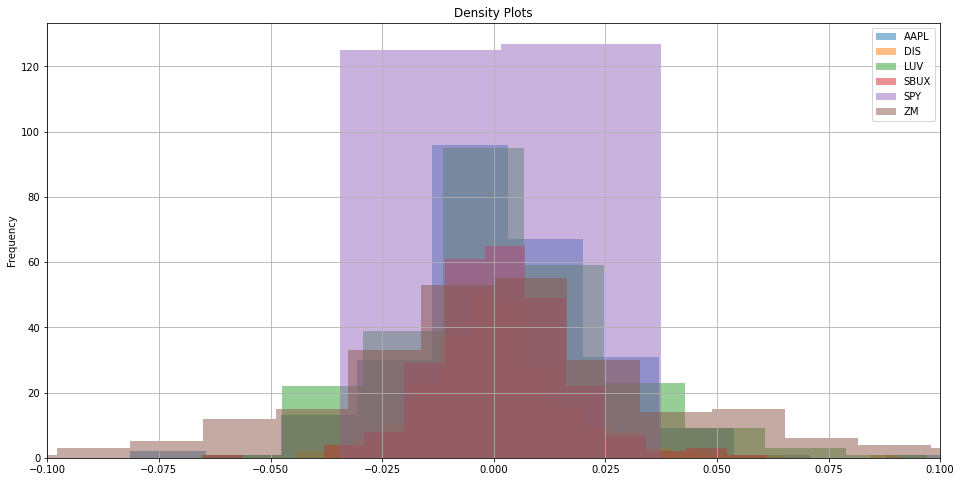

In [79]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
# YOUR CODE HERE
ax = daily_returns_df.groupby('symbol')['rtn'].plot.hist(title='Density Plots', figsize = (16,8),
                                    by=None, grid=True, 
                                    bins = 50,
                                    sharex=False, 
                                    sharey=False, layout=None,backend=None, legend = True,
                                    xlim=(-.1,.10), alpha = .5
                                      )


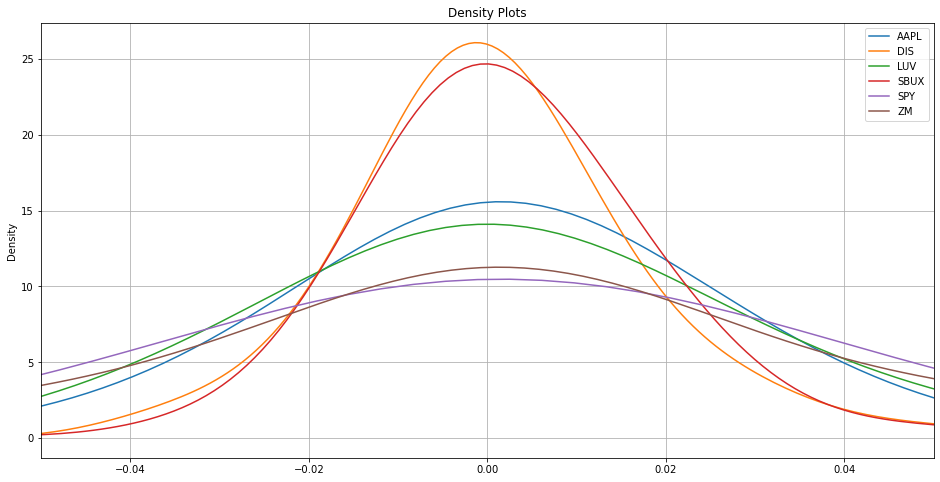

In [81]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size
# YOUR CODE HERE
ax = daily_returns_df.groupby('symbol')['rtn'].plot.density(title='Density Plots', figsize = (16,8),
                                    by=None, grid=True, 
                                    sharex=False, 
                                    sharey=False, layout=None,backend=None, legend = True,
                                    xlim=(-.05,.05)
                                      )


## Reflect on the following question:

**Question:** After analyzing the summary statistics, histogram, and density plot for the SPY, LUV, DIS, AAPL, SBUX, and ZM stocks, which do you think is the most volatile stock based on the daily return data? Which is the least volatile?
    
**Answer:** # disney is the most volitile spy is the least

<AxesSubplot:title={'center':'Zoom Probability Distribution'}, ylabel='Frequency'>

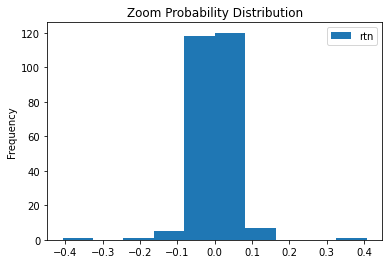

In [84]:
# Generate descriptive statistics
daily_returns_df.describe()

# Visualize distribution of Zoom percent change in closing price using a histogram plot
daily_returns_df[daily_returns_df['symbol']=='ZM'].plot(kind='hist', title='Zoom Probability Distribution')
